In [170]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns

In [171]:
df_sraID = pd.read_csv('../data_tables/sraIDfull.csv', error_bad_lines=False, low_memory=False,quoting=3)

df_sraID

,Run,Experiment,SRAStudy,BioProject,ProjectID,CenterName,Submission,Sample
0,ERR3550121,ERX3556726,ERP000767,PRJEB2600,204335,UOC-CCG,ERA2143351,ERS3773255
1,ERR3550142,ERX3556747,ERP000767,PRJEB2600,204335,UOC-CCG,ERA2143351,ERS3773255
2,ERR3550147,ERX3556752,ERP000767,PRJEB2600,204335,UOC-CCG,ERA2143351,ERS3773263
3,ERR3550125,ERX3556730,ERP000767,PRJEB2600,204335,UOC-CCG,ERA2143351,ERS3773263
4,ERR3550137,ERX3556742,ERP000767,PRJEB2600,204335,UOC-CCG,ERA2143351,ERS3773252
...,...,...,...,...,...,...,...,...
7676058,SRR049674,SRX020916,SRP002493,NaN,0,NIAID-RML-RTS,SRA017695,SRS073299
7676059,SRR049675,SRX021028,SRP002493,NaN,0,NIAID-RML-RTS,SRA017695,SRS073299
7676060,SRR049677,SRX021029,SRP002493,NaN,0,NIAID-RML-RTS,SRA017695,SRS073299
7676061,SRR042496,SRX020084,SRP002064,PRJNA46359,46359,SAN,DIEGO,SRS011854


In [172]:
#SRAStudy ID

In [173]:
df_sraID_SRAStudy = df_sraID[['SRAStudy']].copy()

df_sraID_SRAStudy=df_sraID_SRAStudy.drop_duplicates() #remove duplicated SRAstudy ID
df_sraID_SRAStudy

,SRAStudy
0,ERP000767
26,ERP021269
41,ERP110990
197,ERP108795
299,ERP108142
...,...
7676036,SRP002405
7676043,SRP002407
7676046,SRP001735
7676055,SRP001705


In [174]:
df = pd.read_csv('../data_tables/sraReuseCounts.csv')
df

,ID,reuseCount
0,DRA0000000,1
1,DRA000001,2
2,DRA000010,1
3,DRA000017,0
4,DRA000018,0
...,...,...
80824,PRJNA548821,0
80825,PRJNA549023,0
80826,PRJNA549026,0
80827,PRJNA549826,0


In [175]:
df.columns = ['SRAStudy', 'reuseCount']#change header to SRAStudy
df

,SRAStudy,reuseCount
0,DRA0000000,1
1,DRA000001,2
2,DRA000010,1
3,DRA000017,0
4,DRA000018,0
...,...,...
80824,PRJNA548821,0
80825,PRJNA549023,0
80826,PRJNA549026,0
80827,PRJNA549826,0


In [176]:
df_SRAStudy=pd.merge(df, df_sraID_SRAStudy, on="SRAStudy")
df_SRAStudy

,SRAStudy,reuseCount
0,DRP000009,0
1,DRP000155,0
2,DRP000160,0
3,DRP000161,0
4,DRP000207,0
...,...,...
11469,SRP198866,0
11470,SRP199350,0
11471,SRP201254,0
11472,SRP201956,0


In [178]:
df_SRAStudy['reuseCount']=df_SRAStudy['reuseCount']+1
df_SRAStudy

,SRAStudy,reuseCount
0,DRP000009,2
1,DRP000155,2
2,DRP000160,2
3,DRP000161,2
4,DRP000207,2
...,...,...
11469,SRP198866,2
11470,SRP199350,2
11471,SRP201254,2
11472,SRP201956,2


In [179]:
df1=pd.concat([df, df_SRAStudy]).drop_duplicates(keep=False)#remove SRA Study IDs
df1

,SRAStudy,reuseCount
0,DRA0000000,1
1,DRA000001,2
2,DRA000010,1
3,DRA000017,0
4,DRA000018,0
...,...,...
11469,SRP198866,2
11470,SRP199350,2
11471,SRP201254,2
11472,SRP201956,2


In [180]:
#Submission ID

In [181]:
df1.columns = ['Submission', 'reuseCount']#change header to Submission
df1

,Submission,reuseCount
0,DRA0000000,1
1,DRA000001,2
2,DRA000010,1
3,DRA000017,0
4,DRA000018,0
...,...,...
11469,SRP198866,2
11470,SRP199350,2
11471,SRP201254,2
11472,SRP201956,2


In [182]:
df_sraID_submission = df_sraID[['Submission','SRAStudy']].copy()

df_sraID_submission

,Submission,SRAStudy
0,ERA2143351,ERP000767
1,ERA2143351,ERP000767
2,ERA2143351,ERP000767
3,ERA2143351,ERP000767
4,ERA2143351,ERP000767
...,...,...
7676058,SRA017695,SRP002493
7676059,SRA017695,SRP002493
7676060,SRA017695,SRP002493
7676061,DIEGO,SRP002064


In [183]:
df_submission=pd.merge(df1, df_sraID_submission, on="Submission")
df_submission=df_submission.drop_duplicates(subset=['Submission'],keep=False) #remove duplicated submission
df_submission

,Submission,reuseCount,SRAStudy
56,DRA000046,0,DRP000046
57,DRA000047,0,DRP000047
58,DRA000048,0,DRP000048
59,DRA000049,0,DRP000049
60,DRA000050,0,DRP000050
...,...,...,...
82933,SRA505613,0,SRP095380
82976,SRA578083,0,SRP109933
82979,SRA587358,0,SRP112710
82980,SRA602249,0,SRP038995


In [184]:
df_submission_to_studyID=df_submission.drop(columns=['Submission'])
df_submission_to_studyID

,reuseCount,SRAStudy
56,0,DRP000046
57,0,DRP000047
58,0,DRP000048
59,0,DRP000049
60,0,DRP000050
...,...,...
82933,0,SRP095380
82976,0,SRP109933
82979,0,SRP112710
82980,0,SRP038995


In [186]:
df_submission_to_studyID['reuseCount']=df_submission_to_studyID['reuseCount']+1
df_submission_to_studyID

,reuseCount,SRAStudy
56,2,DRP000046
57,2,DRP000047
58,2,DRP000048
59,2,DRP000049
60,2,DRP000050
...,...,...
82933,2,SRP095380
82976,2,SRP109933
82979,2,SRP112710
82980,2,SRP038995


In [187]:
df_submission1=df_submission.drop(columns=['SRAStudy'])
df_submission1

,Submission,reuseCount
56,DRA000046,0
57,DRA000047,0
58,DRA000048,0
59,DRA000049,0
60,DRA000050,0
...,...,...
82933,SRA505613,0
82976,SRA578083,0
82979,SRA587358,0
82980,SRA602249,0


In [188]:
df2=pd.concat([df1, df_submission1]).drop_duplicates(keep=False)#remove SRA submission IDs
df2

,Submission,reuseCount
0,DRA0000000,1
1,DRA000001,2
2,DRA000010,1
3,DRA000017,0
4,DRA000018,0
...,...,...
11469,SRP198866,2
11470,SRP199350,2
11471,SRP201254,2
11472,SRP201956,2


In [189]:
#Run ID

In [190]:
df2.columns = ['Run', 'reuseCount']#change header to Run
df2

,Run,reuseCount
0,DRA0000000,1
1,DRA000001,2
2,DRA000010,1
3,DRA000017,0
4,DRA000018,0
...,...,...
11469,SRP198866,2
11470,SRP199350,2
11471,SRP201254,2
11472,SRP201956,2


In [191]:
df_sraID_run = df_sraID[['Run','SRAStudy']].copy()
df_sraID_run

,Run,SRAStudy
0,ERR3550121,ERP000767
1,ERR3550142,ERP000767
2,ERR3550147,ERP000767
3,ERR3550125,ERP000767
4,ERR3550137,ERP000767
...,...,...
7676058,SRR049674,SRP002493
7676059,SRR049675,SRP002493
7676060,SRR049677,SRP002493
7676061,SRR042496,SRP002064


In [192]:
df_run=pd.merge(df2, df_sraID_run, on="Run")
df_run=df_run.drop_duplicates(subset=['Run'],keep=False) #remove duplicated runs
df_run

,Run,reuseCount,SRAStudy
0,DRR000002,0,Illumina
1,DRR000022,0,DRP000010
2,DRR000023,0,DRP000010
3,DRR000030,0,DRP000010
4,DRR000093,0,DRP000030
...,...,...,...
29657,SRR999614,0,SRP030207
29658,SRR999615,0,SRP030207
29659,SRR999616,0,SRP030207
29660,SRR999617,0,SRP030207


In [193]:
df_run_to_studyID=df_run.drop(columns=['Run'])
df_run_to_studyID

,reuseCount,SRAStudy
0,0,Illumina
1,0,DRP000010
2,0,DRP000010
3,0,DRP000010
4,0,DRP000030
...,...,...
29657,0,SRP030207
29658,0,SRP030207
29659,0,SRP030207
29660,0,SRP030207


In [195]:
df_run_to_studyID['reuseCount']=df_run_to_studyID['reuseCount']+1
df_run_to_studyID

,reuseCount,SRAStudy
0,2,Illumina
1,2,DRP000010
2,2,DRP000010
3,2,DRP000010
4,2,DRP000030
...,...,...
29657,2,SRP030207
29658,2,SRP030207
29659,2,SRP030207
29660,2,SRP030207


In [196]:
df_run1=df_run.drop(columns=['SRAStudy'])
df_run1

,Run,reuseCount
0,DRR000002,0
1,DRR000022,0
2,DRR000023,0
3,DRR000030,0
4,DRR000093,0
...,...,...
29657,SRR999614,0
29658,SRR999615,0
29659,SRR999616,0
29660,SRR999617,0


In [197]:
df3=pd.concat([df2, df_run1]).drop_duplicates(keep=False)#remove SRA run IDs
df3

,Run,reuseCount
0,DRA0000000,1
1,DRA000001,2
2,DRA000010,1
3,DRA000017,0
4,DRA000018,0
...,...,...
11469,SRP198866,2
11470,SRP199350,2
11471,SRP201254,2
11472,SRP201956,2


In [198]:
#Experiment ID

In [199]:
df3.columns = ['Experiment', 'reuseCount']#change header to Experiment
df3

,Experiment,reuseCount
0,DRA0000000,1
1,DRA000001,2
2,DRA000010,1
3,DRA000017,0
4,DRA000018,0
...,...,...
11469,SRP198866,2
11470,SRP199350,2
11471,SRP201254,2
11472,SRP201956,2


In [200]:
df_sraID_experiment = df_sraID[['Experiment','SRAStudy']].copy()
df_sraID_experiment

,Experiment,SRAStudy
0,ERX3556726,ERP000767
1,ERX3556747,ERP000767
2,ERX3556752,ERP000767
3,ERX3556730,ERP000767
4,ERX3556742,ERP000767
...,...,...
7676058,SRX020916,SRP002493
7676059,SRX021028,SRP002493
7676060,SRX021029,SRP002493
7676061,SRX020084,SRP002064


In [201]:
df_experiment=pd.merge(df3, df_sraID_experiment, on="Experiment")
df_experiment=df_experiment.drop_duplicates(subset=['Experiment'],keep=False) #remove duplicated experiments
df_experiment

,Experiment,reuseCount,SRAStudy
0,DRX000001,0,Illumina
10,DRX000196,0,DRP000161
11,DRX000197,0,DRP000161
12,DRX000198,0,DRP000161
13,DRX000199,0,DRP000161
...,...,...,...
23101,SRX998855,0,SRP057385
23102,SRX998856,0,SRP057385
23103,SRX998857,0,SRP057385
23104,SRX998858,0,SRP057385


In [202]:
df_experiment_to_studyID=df_experiment.drop(columns=['Experiment'])
df_experiment_to_studyID

,reuseCount,SRAStudy
0,0,Illumina
10,0,DRP000161
11,0,DRP000161
12,0,DRP000161
13,0,DRP000161
...,...,...
23101,0,SRP057385
23102,0,SRP057385
23103,0,SRP057385
23104,0,SRP057385


In [204]:
df_experiment_to_studyID['reuseCount']=df_experiment_to_studyID['reuseCount']+1
df_experiment_to_studyID

,reuseCount,SRAStudy
0,2,Illumina
10,2,DRP000161
11,2,DRP000161
12,2,DRP000161
13,2,DRP000161
...,...,...
23101,2,SRP057385
23102,2,SRP057385
23103,2,SRP057385
23104,2,SRP057385


In [205]:
df_experiment1=df_experiment.drop(columns=['SRAStudy'])
df_experiment1

,Experiment,reuseCount
0,DRX000001,0
10,DRX000196,0
11,DRX000197,0
12,DRX000198,0
13,DRX000199,0
...,...,...
23101,SRX998855,0
23102,SRX998856,0
23103,SRX998857,0
23104,SRX998858,0


In [206]:
df4=pd.concat([df3, df_experiment1]).drop_duplicates(keep=False)#remove SRA experiment IDs
df4

,Experiment,reuseCount
0,DRA0000000,1
1,DRA000001,2
2,DRA000010,1
3,DRA000017,0
4,DRA000018,0
...,...,...
11469,SRP198866,2
11470,SRP199350,2
11471,SRP201254,2
11472,SRP201956,2


In [207]:
#Sample ID

In [208]:
df4.columns = ['Sample', 'reuseCount']#change header
df4

,Sample,reuseCount
0,DRA0000000,1
1,DRA000001,2
2,DRA000010,1
3,DRA000017,0
4,DRA000018,0
...,...,...
11469,SRP198866,2
11470,SRP199350,2
11471,SRP201254,2
11472,SRP201956,2


In [209]:
df_sraID_sample = df_sraID[['Sample','SRAStudy']].copy()
df_sraID_sample

,Sample,SRAStudy
0,ERS3773255,ERP000767
1,ERS3773255,ERP000767
2,ERS3773263,ERP000767
3,ERS3773263,ERP000767
4,ERS3773252,ERP000767
...,...,...
7676058,SRS073299,SRP002493
7676059,SRS073299,SRP002493
7676060,SRS073299,SRP002493
7676061,SRS011854,SRP002064


In [210]:
df_sample=pd.merge(df4, df_sraID_sample, on="Sample")
df_sample=df_sample.drop_duplicates(subset=['Sample'],keep=False) #remove duplicated samples
df_sample

,Sample,reuseCount,SRAStudy
10,DRS000684,0,DRP000396
11,DRS000782,0,DRP000437
12,DRS000786,0,DRP000437
13,DRS001093,0,DRP000490
14,DRS001594,0,DRP000622
...,...,...,...
54294,SRS979628,0,SRP060399
54295,SRS980707,1,SRP060467
54296,SRS981339,0,SRP060518
54297,SRS985993,0,SRP060579


In [211]:
df_sample_to_studyID=df_sample.drop(columns=['Sample'])
df_sample_to_studyID

,reuseCount,SRAStudy
10,0,DRP000396
11,0,DRP000437
12,0,DRP000437
13,0,DRP000490
14,0,DRP000622
...,...,...
54294,0,SRP060399
54295,1,SRP060467
54296,0,SRP060518
54297,0,SRP060579


In [212]:
df_sample_to_studyID['reuseCount']=df_sample_to_studyID['reuseCount']+1
df_sample_to_studyID

,reuseCount,SRAStudy
10,1,DRP000396
11,1,DRP000437
12,1,DRP000437
13,1,DRP000490
14,1,DRP000622
...,...,...
54294,1,SRP060399
54295,2,SRP060467
54296,1,SRP060518
54297,1,SRP060579


In [213]:
df_sample1=df_sample.drop(columns=['SRAStudy'])
df_sample1

,Sample,reuseCount
10,DRS000684,0
11,DRS000782,0
12,DRS000786,0
13,DRS001093,0
14,DRS001594,0
...,...,...
54294,SRS979628,0
54295,SRS980707,1
54296,SRS981339,0
54297,SRS985993,0


In [214]:
df5=pd.concat([df4, df_sample1]).drop_duplicates(keep=False)#remove SRA sample IDs
df5

,Sample,reuseCount
0,DRA0000000,1
1,DRA000001,2
2,DRA000010,1
3,DRA000017,0
4,DRA000018,0
...,...,...
11469,SRP198866,2
11470,SRP199350,2
11471,SRP201254,2
11472,SRP201956,2


In [215]:
#calculate the reuse by normalizing to SRAStudy IDs

In [231]:
df_new=pd.concat([df_SRAStudy,df_submission_to_studyID,df_run_to_studyID,df_experiment_to_studyID,df_sample_to_studyID],sort=True)
df_new

,SRAStudy,reuseCount
0,DRP000009,2
1,DRP000155,2
2,DRP000160,2
3,DRP000161,2
4,DRP000207,2
...,...,...
54294,SRP060399,1
54295,SRP060467,2
54296,SRP060518,1
54297,SRP060579,1


In [236]:
#df_count=df_new.groupby(['SRAStudy']).sum()
#df_count

,reuseCount
SRAStudy,
0,7
0.0,13
100,4
454,23
AB,4
...,...
SRP200173,12
SRP201254,2
SRP201956,2


In [239]:
df_count=df_new.groupby('SRAStudy')['reuseCount'].count().reset_index(name='count')
df_count

,SRAStudy,count
0,0,4
1,0.0,7
2,100,2
3,454,11
4,AB,2
...,...,...
20054,SRP200173,6
20055,SRP201254,1
20056,SRP201956,1
20057,SRP212328,1


Text(-1.4499999999999957, 0.5, 'Count')

<Figure size 2880x1800 with 0 Axes>

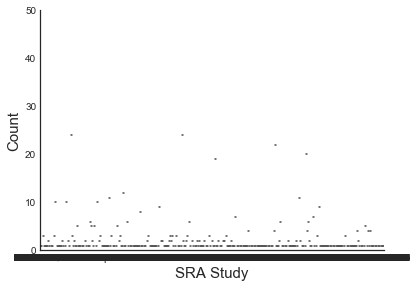

In [241]:
# set aesthetics
plt.style.use(['ggplot', 'seaborn-white'])
plt.figure(figsize=(40,25))

# generate axes
ax = sns.catplot(x='SRAStudy', y='count', data=df_count,
            height=4,aspect=1.5,kind='boxen')
sns.despine()
plt.ylim(0, 50)

# set axis labels
ax.axes[0,0].set_xlabel('SRA Study', fontsize = 15)
ax.axes[0,0].set_ylabel('Count', fontsize = 15)
#plt.yscale('log')

# save to .png
#ax.savefig('distplot.png', dpi = 200, bbox_inches = 'tight', transparent = False)